# Evn

In [1]:
import os
import random
import shutil
import json
import zipfile
import math
import copy
import collections
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm

In [2]:
# random seed initialize
random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [3]:
!nvidia-smi

Thu Jan 28 02:30:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 입력


In [4]:
# Generate linearly spaced vector
value = np.linspace(-10, 10, 100) # 0 부터 10까지 linear 하게 값을 나누어줌
value

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

# sigmoid

In [5]:
# sigmoid
hidden_11 = tf.nn.sigmoid(value)
print(hidden_11)

tf.Tensor(
[4.53978687e-05 5.55606489e-05 6.79983174e-05 8.32200197e-05
 1.01848815e-04 1.24647146e-04 1.52547986e-04 1.86692945e-04
 2.28478855e-04 2.79614739e-04 3.42191434e-04 4.18766684e-04
 5.12469082e-04 6.27124987e-04 7.67413430e-04 9.39055039e-04
 1.14904229e-03 1.40591988e-03 1.72012560e-03 2.10440443e-03
 2.57431039e-03 3.14881358e-03 3.85103236e-03 4.70911357e-03
 5.75728612e-03 7.03711536e-03 8.59898661e-03 1.05038445e-02
 1.28252101e-02 1.56514861e-02 1.90885420e-02 2.32625358e-02
 2.83228820e-02 3.44451957e-02 4.18339400e-02 5.07243606e-02
 6.13831074e-02 7.41067363e-02 8.92170603e-02 1.07052146e-01
 1.27951705e-01 1.52235823e-01 1.80176593e-01 2.11963334e-01
 2.47663801e-01 2.87185901e-01 3.30246430e-01 3.76354517e-01
 4.24816868e-01 4.74768924e-01 5.25231076e-01 5.75183132e-01
 6.23645483e-01 6.69753570e-01 7.12814099e-01 7.52336199e-01
 7.88036666e-01 8.19823407e-01 8.47764177e-01 8.72048295e-01
 8.92947854e-01 9.10782940e-01 9.25893264e-01 9.38616893e-01
 9.49275639e-

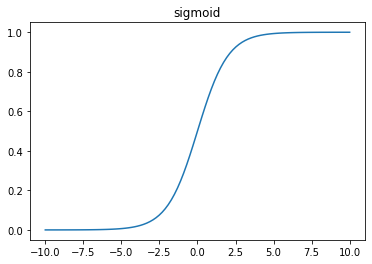

In [6]:
# draw plot
plt.plot(value, hidden_11)
plt.title('sigmoid')
plt.show()

In [7]:
# 1 / (1 + exp(-x))
hidden_12 = 1 / (1 + np.exp(-value))
print(hidden_12)

[4.53978687e-05 5.55606489e-05 6.79983174e-05 8.32200197e-05
 1.01848815e-04 1.24647146e-04 1.52547986e-04 1.86692945e-04
 2.28478855e-04 2.79614739e-04 3.42191434e-04 4.18766684e-04
 5.12469082e-04 6.27124987e-04 7.67413430e-04 9.39055039e-04
 1.14904229e-03 1.40591988e-03 1.72012560e-03 2.10440443e-03
 2.57431039e-03 3.14881358e-03 3.85103236e-03 4.70911357e-03
 5.75728612e-03 7.03711536e-03 8.59898661e-03 1.05038445e-02
 1.28252101e-02 1.56514861e-02 1.90885420e-02 2.32625358e-02
 2.83228820e-02 3.44451957e-02 4.18339400e-02 5.07243606e-02
 6.13831074e-02 7.41067363e-02 8.92170603e-02 1.07052146e-01
 1.27951705e-01 1.52235823e-01 1.80176593e-01 2.11963334e-01
 2.47663801e-01 2.87185901e-01 3.30246430e-01 3.76354517e-01
 4.24816868e-01 4.74768924e-01 5.25231076e-01 5.75183132e-01
 6.23645483e-01 6.69753570e-01 7.12814099e-01 7.52336199e-01
 7.88036666e-01 8.19823407e-01 8.47764177e-01 8.72048295e-01
 8.92947854e-01 9.10782940e-01 9.25893264e-01 9.38616893e-01
 9.49275639e-01 9.581660

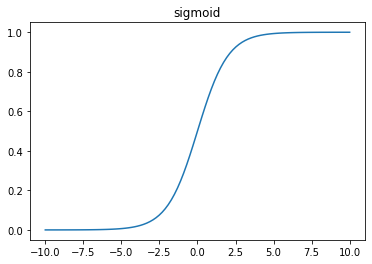

In [8]:
# draw plot
plt.plot(value, hidden_12)
plt.title('sigmoid')
plt.show()

# relu

In [9]:
hidden_21 = tf.nn.relu(value)
print(hidden_21)

tf.Tensor(
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.54545455  4.74747475  4.94949495  5.15151515  5.35353535  5.55555556
  5.75757576  5.95959596  6.16161616  6.36363636  6.56565657  6.76767677
  6.96969697  7.17171717  7.373

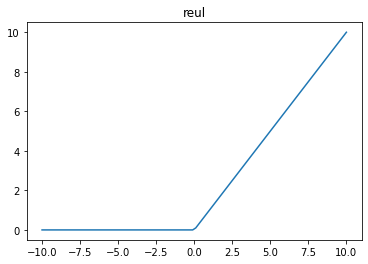

In [10]:
# draw plot
plt.plot(value, hidden_21)
plt.title('reul')
plt.show()

In [11]:
# max(0, x)
hidden_22 = np.maximum(0, value)
print(hidden_22)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.54545455  4.74747475  4.94949495  5.15151515  5.35353535  5.55555556
  5.75757576  5.95959596  6.16161616  6.36363636  6.56565657  6.76767677
  6.96969697  7.17171717  7.37373737  7.57

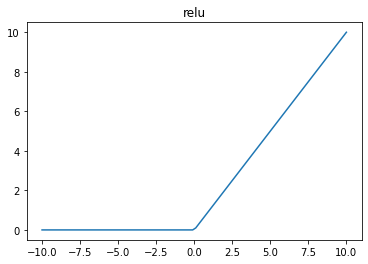

In [12]:
# draw plot
plt.plot(value, hidden_22)
plt.title('relu')
plt.show()

# relu6

In [13]:
hidden_31 = tf.nn.relu6(value)
print(hidden_31)

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.1010101  0.3030303  0.50505051 0.70707071
 0.90909091 1.11111111 1.31313131 1.51515152 1.71717172 1.91919192
 2.12121212 2.32323232 2.52525253 2.72727273 2.92929293 3.13131313
 3.33333333 3.53535354 3.73737374 3.93939394 4.14141414 4.34343434
 4.54545455 4.74747475 4.94949495 5.15151515 5.35353535 5.55555556
 5.75757576 5.95959596 6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.  

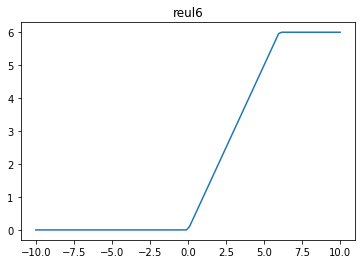

In [14]:
plt.plot(value, hidden_31)
plt.title('reul6')
plt.show()

In [15]:
# min(6, max(0, x))
hidden_32 = np.minimum(6, np.maximum(0, value))
print(hidden_32)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.1010101  0.3030303  0.50505051 0.70707071
 0.90909091 1.11111111 1.31313131 1.51515152 1.71717172 1.91919192
 2.12121212 2.32323232 2.52525253 2.72727273 2.92929293 3.13131313
 3.33333333 3.53535354 3.73737374 3.93939394 4.14141414 4.34343434
 4.54545455 4.74747475 4.94949495 5.15151515 5.35353535 5.55555556
 5.75757576 5.95959596 6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.  

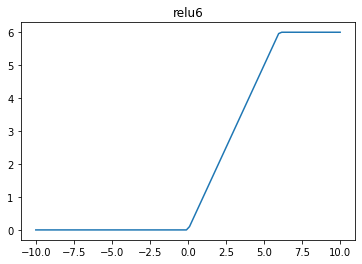

In [16]:
# draw plot
plt.plot(value, hidden_32)
plt.title('relu6')
plt.show()

# tanh

In [17]:
# tanh
hidden_41 = tf.nn.tanh(value)
print(hidden_41)

tf.Tensor(
[-1.         -0.99999999 -0.99999999 -0.99999999 -0.99999998 -0.99999997
 -0.99999995 -0.99999993 -0.9999999  -0.99999984 -0.99999977 -0.99999965
 -0.99999947 -0.99999921 -0.99999882 -0.99999823 -0.99999735 -0.99999604
 -0.99999406 -0.99999111 -0.99998668 -0.99998004 -0.99997011 -0.99995523
 -0.99993294 -0.99989955 -0.99984955 -0.99977465 -0.99966248 -0.99949449
 -0.9992429  -0.99886619 -0.99830218 -0.99745797 -0.99619479 -0.9943057
 -0.99148279 -0.98726936 -0.98099146 -0.97166188 -0.95785067 -0.93752157
 -0.90784899 -0.86506558 -0.8044548  -0.72069563 -0.60883666 -0.46607983
 -0.2940833  -0.10066796  0.10066796  0.2940833   0.46607983  0.60883666
  0.72069563  0.8044548   0.86506558  0.90784899  0.93752157  0.95785067
  0.97166188  0.98099146  0.98726936  0.99148279  0.9943057   0.99619479
  0.99745797  0.99830218  0.99886619  0.9992429   0.99949449  0.99966248
  0.99977465  0.99984955  0.99989955  0.99993294  0.99995523  0.99997011
  0.99998004  0.99998668  0.99999111  0.9

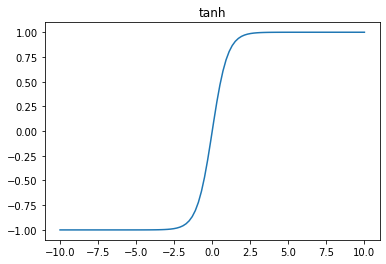

In [18]:
# draw plot
plt.plot(value, hidden_41)
plt.title('tanh')
plt.show()

In [19]:
# (exp(x) - exp(-x)) / (exp(x) + exp(-x))
hidden_42 = (np.exp(value) - np.exp(-value)) / (np.exp(value) + np.exp(-value))
print(hidden_42)

[-1.         -0.99999999 -0.99999999 -0.99999999 -0.99999998 -0.99999997
 -0.99999995 -0.99999993 -0.9999999  -0.99999984 -0.99999977 -0.99999965
 -0.99999947 -0.99999921 -0.99999882 -0.99999823 -0.99999735 -0.99999604
 -0.99999406 -0.99999111 -0.99998668 -0.99998004 -0.99997011 -0.99995523
 -0.99993294 -0.99989955 -0.99984955 -0.99977465 -0.99966248 -0.99949449
 -0.9992429  -0.99886619 -0.99830218 -0.99745797 -0.99619479 -0.9943057
 -0.99148279 -0.98726936 -0.98099146 -0.97166188 -0.95785067 -0.93752157
 -0.90784899 -0.86506558 -0.8044548  -0.72069563 -0.60883666 -0.46607983
 -0.2940833  -0.10066796  0.10066796  0.2940833   0.46607983  0.60883666
  0.72069563  0.8044548   0.86506558  0.90784899  0.93752157  0.95785067
  0.97166188  0.98099146  0.98726936  0.99148279  0.9943057   0.99619479
  0.99745797  0.99830218  0.99886619  0.9992429   0.99949449  0.99966248
  0.99977465  0.99984955  0.99989955  0.99993294  0.99995523  0.99997011
  0.99998004  0.99998668  0.99999111  0.99999406  0.

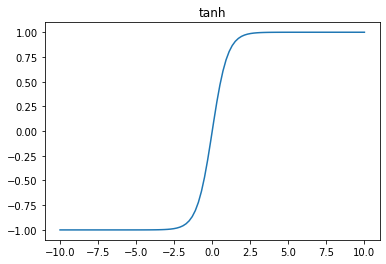

In [20]:
# draw plot
plt.plot(value, hidden_42)
plt.title('tanh')
plt.show()

# gelu

In [21]:
def gelu(x):
    """
    gelu activation 함수
    :param x: 입력 값
    :return: gelu activation result
    """
    return 0.5 * x * (1 + K.tanh(x * 0.7978845608 * (1 + 0.044715 * x * x)))

In [22]:
# 0.5x(1 + tanh(x * sqrt(2/pi)(x + 0.044715 + x**3)
hidden_51 = gelu(value)
print(hidden_51)

tf.Tensor(
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.98110277e-16 -3.48206312e-15
 -3.41870191e-14 -3.13441753e-13 -2.55613712e-12 -1.86322002e-11
 -1.21817018e-10 -7.16851225e-10 -3.81000108e-09 -1.83522315e-08
 -8.03913237e-08 -3.21343461e-07 -1.17610738e-06 -3.95468209e-06
 -1.22581322e-05 -3.51427132e-05 -9.34933847e-05 -2.31568396e-04
 -5.35702932e-04 -1.16111217e-03 -2.36504974e-03 -4.54009269e-03
 -8.23560965e-03 -1.41499397e-02 -2.30725243e-02 -3.57565386e-02
 -5.27107295e-02 -7.39159104e-02 -9.84971090e-02 -1.24413529e-01
 -1.48256672e-01 -1.65257920e-01 -1.69585311e-01 -1.54948003e-01
 -1.15436961e-01 -4.64415715e-02  5.45685295e-02  1.87593342e-01
  3.50102502e-01  5.37485396e-01  7.43832990e-01  9.62854440e-01
  1.18871778e+00  1.41665441e+00  1.64325581e+00  1.86648119e+00
  2.08545558e+

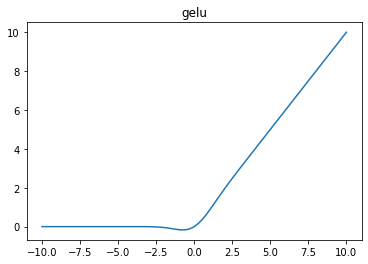

In [23]:
# draw plot
plt.plot(value, hidden_51)
plt.title('gelu')
plt.show()